# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

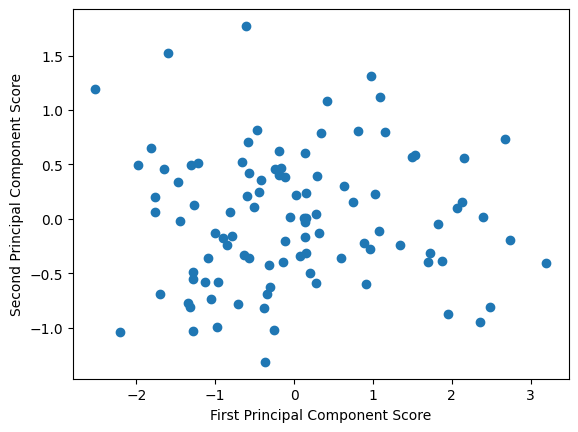

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

 Since the outliers are located in the upper left corner of the scatter plot, it indicates that their PC1 score is low.A low value for PC1 suggests that these outliers are far from the main cluster The PC2 score for these outliers is high, as they are located at the top of the scatter plot.

 PC2 appears to have a high score for these outliers, we can infer that series_3 is likely driving the variance in the direction of PC2

 series_1 and series_2 are highly correlated by design. In the code, series_2 is generated as a noisy version of series_1

The PCA scatter plot reduces the original data (which had three series) into two dimensions (PC1 and PC2).The plot highlights the outliers.

PCA reduces the data to only two components, which may cause some loss of information.While PCA provides a summary of the data, it doesn't give direct information about the original variables .


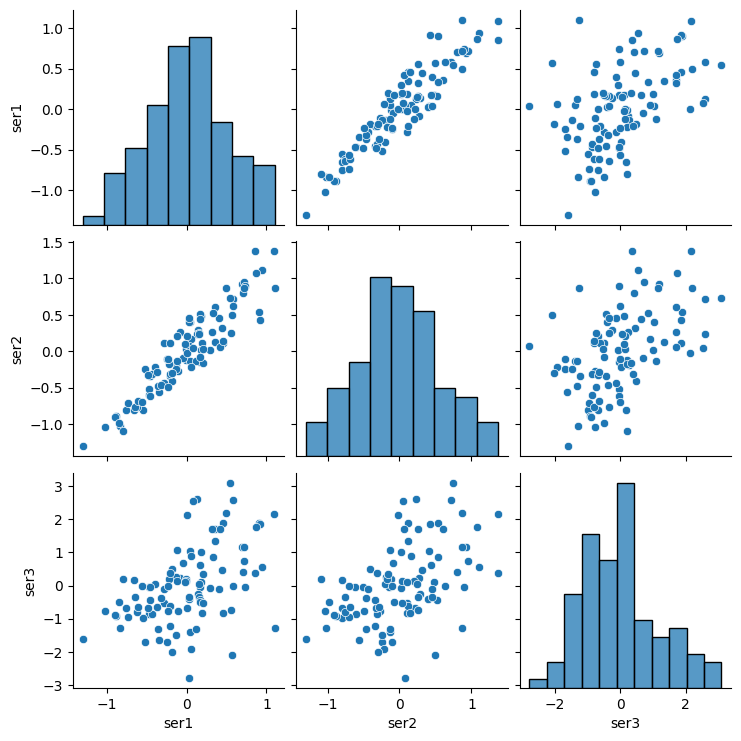

In [2]:
import seaborn as sns
sns.pairplot(df)
plt.show()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

from ucimlrepo import fetch_ucirepo 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
df = bank_marketing.data.features
df.head()

ModuleNotFoundError: No module named 'ucimlrepo'

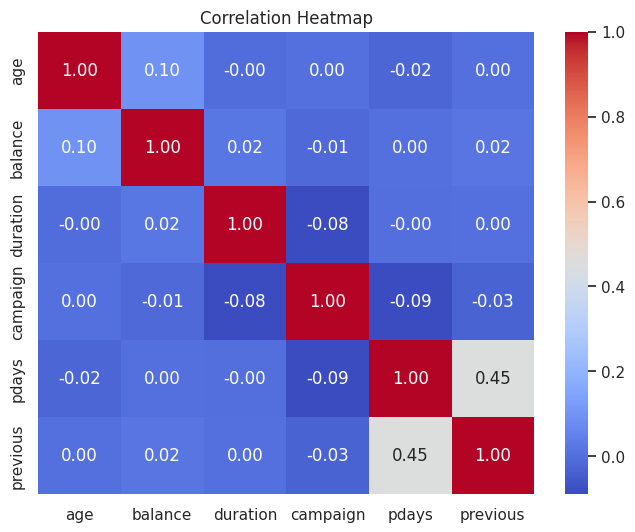

In [ ]:
# Select numeric columns for correlation
df_numeric = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

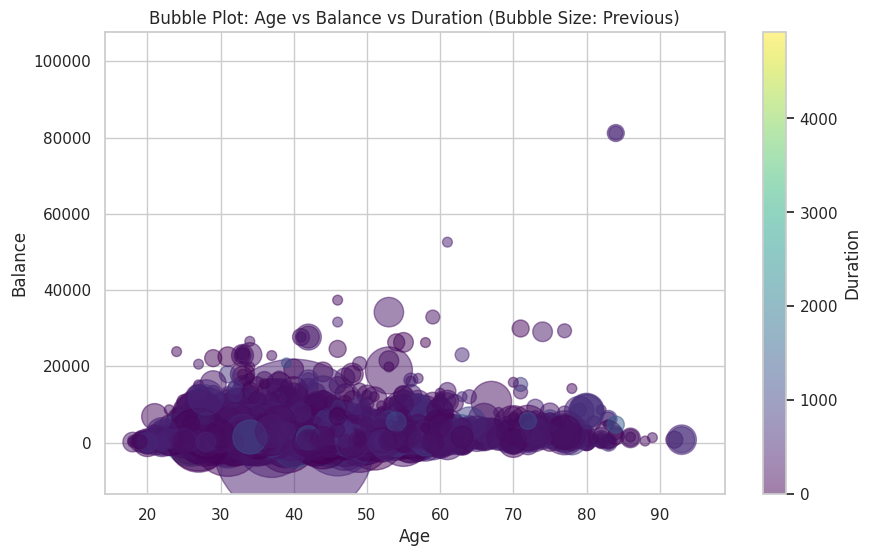

In [ ]:
plt.figure(figsize=(10, 6))

# Create a bubble plot where size of bubble is proportional to 'previous'
plt.scatter(df['age'], df['balance'], s=df['previous'] * 50, alpha=0.5, c=df['duration'], cmap='viridis')

# Label the axes
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Bubble Plot: Age vs Balance vs Duration (Bubble Size: Previous)')

# Show the color bar to represent duration
plt.colorbar(label='Duration')
plt.show()

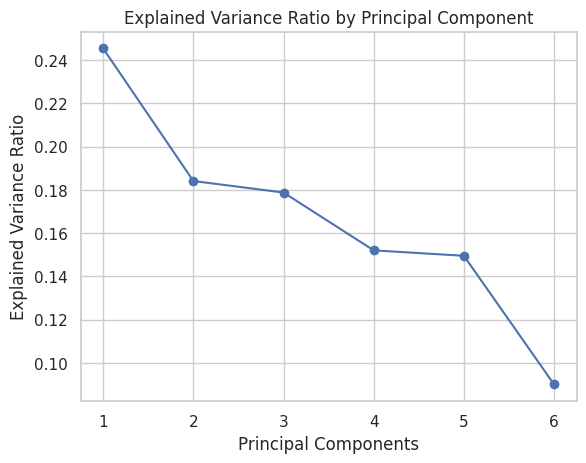

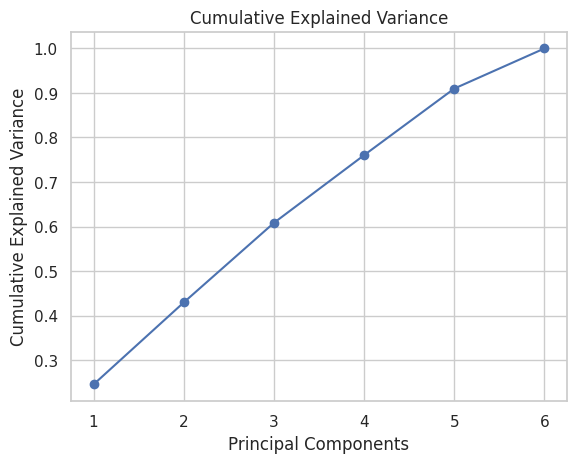

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical columns for PCA
df_numeric = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Plot explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative variance explained
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features and target variable
X = df[['age', 'duration', 'campaign', 'pdays', 'previous']]  # Features
y = df['balance']  # Target variable (balance)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
print(f"R-squared: {model.score(X_test, y_test)}")


R-squared: 0.008503535030026321


If you’re not seeing outliers visually, but the R-squared value is very low, this suggests that the model isn't explaining much of the variance in the target variable (balance).

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

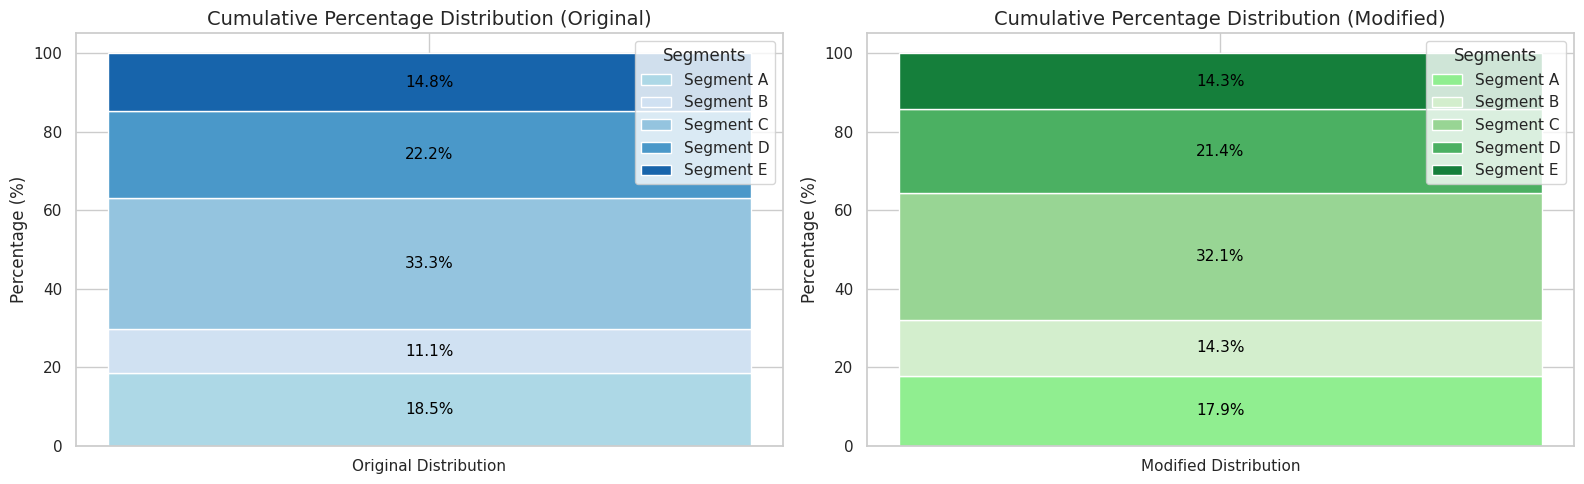

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Customer Segment': ['Segment A', 'Segment B', 'Segment C', 'Segment D', 'Segment E'],
    'Distribution': [250, 150, 450, 300, 200],
    'Modified Distribution': [250, 200, 450, 300, 200] 
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the total distribution to use for percentages
total_distribution = df['Distribution'].sum()
total_distribution_M = df['Modified Distribution'].sum()

# Calculate the individual percentage contributions for each segment
df['Percentage Distribution'] = df['Distribution'] / total_distribution * 100
df['Percentage Modified Distribution'] = df['Modified Distribution'] / total_distribution_M * 100

# Create a plot with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Plot the stacked bar chart for Distribution percentages on the first subplot
ax[0].bar('Original Distribution', df['Percentage Distribution'].iloc[0], color='lightblue', label='Segment A')
for i in range(1, len(df)):
    ax[0].bar('Original Distribution', df['Percentage Distribution'].iloc[i], 
              bottom=df['Percentage Distribution'].iloc[:i].sum(), color=plt.cm.Blues(i/len(df)), label=f'Segment {chr(65 + i)}')

# Add labels on top of each segment in the first subplot
cumulative_sum = 0
for i in range(len(df)):
    cumulative_sum += df['Percentage Distribution'].iloc[i]
    ax[0].text('Original Distribution', cumulative_sum - df['Percentage Distribution'].iloc[i] / 2, 
               f'{df["Percentage Distribution"].iloc[i]:.1f}%', ha='center', va='center', fontsize=11, color='black')

ax[0].set_title('Cumulative Percentage Distribution (Original)', fontsize=14)
ax[0].set_ylabel('Percentage (%)', fontsize=12)

# Plot the stacked bar chart for Modified Distribution percentages on the second subplot
ax[1].bar('Modified Distribution', df['Percentage Modified Distribution'].iloc[0], color='lightgreen', label='Segment A')
for i in range(1, len(df)):
    ax[1].bar('Modified Distribution', df['Percentage Modified Distribution'].iloc[i], 
              bottom=df['Percentage Modified Distribution'].iloc[:i].sum(), color=plt.cm.Greens(i/len(df)), label=f'Segment {chr(65 + i)}')

# Add labels on top of each segment in the second subplot
cumulative_sum = 0
for i in range(len(df)):
    cumulative_sum += df['Percentage Modified Distribution'].iloc[i]
    ax[1].text('Modified Distribution', cumulative_sum - df['Percentage Modified Distribution'].iloc[i] / 2, 
               f'{df["Percentage Modified Distribution"].iloc[i]:.1f}%', ha='center', va='center', fontsize=11, color='black')

ax[1].set_title('Cumulative Percentage Distribution (Modified)', fontsize=14)
ax[1].set_ylabel('Percentage (%)', fontsize=12)

# Add a legend
ax[0].legend(title='Segments')
ax[1].legend(title='Segments')

# Improve layout and show the plot
plt.tight_layout()
plt.show()
